In [44]:
import cv2
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import dlib
from imutils import face_utils
import scipy.spatial as spatial


In [78]:
# chahat_img = cv2.imread('/home/pratique/Downloads/cmsc733-Pictorial Information/project_2_face_swap/YourDirectoryID_p2/Data/chahat_c.jpeg')
chahat_img = cv2.imread('/home/pratique/Downloads/cmsc733-Pictorial Information/project_2_face_swap/YourDirectoryID_p2/Data/snehesh.jpg')
chahat_img = cv2.cvtColor(chahat_img,cv2.COLOR_BGR2RGB)
# nitin_img = cv2.imread('/home/pratique/Downloads/cmsc733-Pictorial Information/project_2_face_swap/YourDirectoryID_p2/Data/nitin.jpg')
nitin_img = cv2.imread('/home/pratique/Downloads/cmsc733-Pictorial Information/project_2_face_swap/YourDirectoryID_p2/Data/abhinav.jpg')
nitin_img = cv2.cvtColor(nitin_img,cv2.COLOR_BGR2RGB)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/home/pratique/Downloads/cmsc733-Pictorial Information/project_2_face_swap/YourDirectoryID_p2/shape_predictor_68_face_landmarks.dat')

In [79]:
tuple(np.shape(nitin_img))


(1036, 1036, 3)

In [80]:
chahat_img_size = np.shape(chahat_img)
nitin_img_size = np.shape(nitin_img)
reshape_size = np.minimum(chahat_img_size,nitin_img_size)
print(tuple(reshape_size))
print(reshape_size)
if(reshape_size is chahat_img_size):
    nitin_img = cv2.resize(nitin_img,tuple(reshape_size[:2]))
    print('nitin reshaped')
else:
    chahat_img = cv2.resize(chahat_img,tuple(reshape_size[:2]))
    print('chahat reshaped')
    
nitin_img_copy =nitin_img.copy()

(200, 200, 3)
[200 200   3]
chahat reshaped


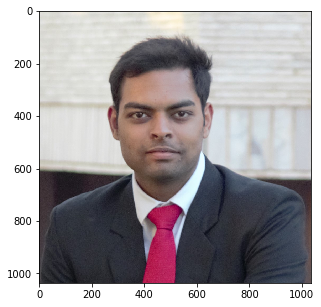

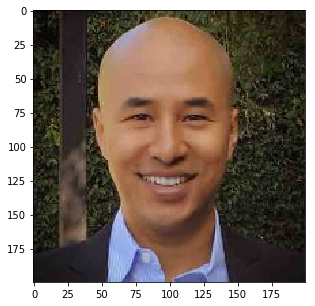

In [81]:
plt.imshow(nitin_img)
plt.show()
plt.imshow(chahat_img)

In [82]:
chahat_img_gray = cv2.cvtColor(chahat_img, cv2.COLOR_BGR2GRAY)
nitin_img_gray = cv2.cvtColor(nitin_img, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
# rects_chahat = detector(chahat_img_gray, 1)
# rects_nitin = detector(nitin_img_gray, 1)
# rects_chahat

In [83]:
def draw_point(img, p, color ):
    cv2.circle( img, p, 2, color, cv2.cv.CV_FILLED, cv2.CV_AA, 0 )
def draw_features_on_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    rects = detector(gray, 1)
#     print('rects')
#     print(rects)
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(img, rect)
        shape = face_utils.shape_to_np(shape)
        points = shape
#         print(shape)
#         print('next')

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # show the face number
        cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
        return img, points
# show the output image with the face detections + facial landmarks
chahat_features,chahat_points = draw_features_on_img(chahat_img.copy())
nitin_features,nitin_points = draw_features_on_img(nitin_img.copy())
plt.rcParams["figure.figsize"] = (10,10)


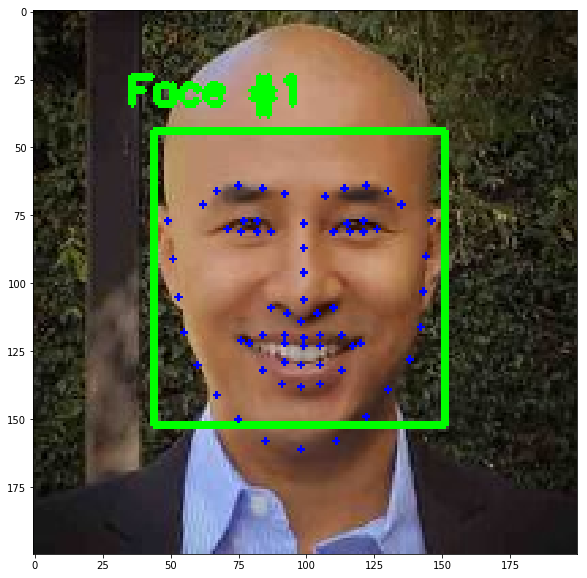

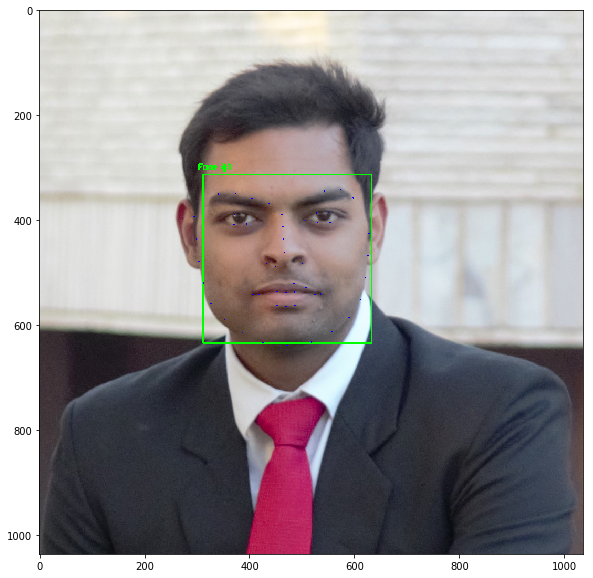

In [84]:
plt.imshow(chahat_features)
# print(np.shape(chahat_features))
# print(np.shape(nitin_features))
plt.show()
plt.imshow(nitin_features)

In [85]:
size = np.shape(chahat_img)
chahat_img_rect = (0,0,size[1],size[0])
size = np.shape(nitin_img)
nitin_img_rect = (0,0,size[1],size[0])

In [86]:
chahat_img_subdiv  = cv2.Subdiv2D(chahat_img_rect)
nitin_img_subdiv  = cv2.Subdiv2D(nitin_img_rect)

In [87]:
# Draw delaunay triangles
def draw_delaunay(img, subdiv, delaunay_color):
 
    triangleList = subdiv.getTriangleList();
    print(triangleList)
    print(len(triangleList))
    size = img.shape
    r = (0, 0, size[1], size[0])
 
    for t in triangleList :
         
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
        cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
        cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)
    return img

In [88]:
print(len(chahat_points))

68


In [89]:
chahat_points[1]

array([51, 91])

In [90]:
np.shape(chahat_img)[2]

3

In [91]:
def draw_matches(img1,pts1,img2,pts2):
    h = max(np.shape(img1)[0],np.shape(img2)[0])
    w = np.shape(img1)[1]+np.shape(img2)[1]
    w_shift = np.shape(img1)[1]
    new_img = np.hstack((img1,img2))
    for i,_ in enumerate(pts1):
        if i>19:
            cv2.line(new_img,(pts1[i][0],pts1[i][1]),(pts2[i][0]+w_shift,pts2[i][1]),(255,0,0),1)
    return new_img
    

In [92]:
# montage = draw_matches(chahat_img.copy(), chahat_points, nitin_img.copy(), nitin_points)
# plt.rcParams["figure.figsize"] = (50,50)
# plt.imshow(montage)

In [93]:
chahat_points_tuple = tuple(map(tuple, chahat_points))

In [94]:
for point in chahat_points_tuple:
    chahat_img_subdiv.insert(point)
# for point in nitin_points:
#     nitin_img_subdiv.insert(point)

[[ 600.    0.    0.  600.  122.  149.]
 [   0.  600.  600.    0. -600. -600.]
 [   0.  600. -600. -600.   55.  118.]
 [-600. -600.  600.    0.  122.   64.]
 [  67.   66.   77.   77.   71.   80.]
 [  77.   77.   67.   66.   75.   64.]
 [-600. -600.   51.   91.   53.  105.]
 [  51.   91. -600. -600.   49.   77.]
 [  49.   77. -600. -600.   67.   66.]
 [  92.  129.   99.  123.   98.  130.]
 [  99.  123.   92.  129.   92.  122.]
 [-600. -600.   53.  105.   55.  118.]
 [  51.   91.   49.   77.   71.   80.]
 [ 105.  137.  111.  158.   98.  138.]
 [ 111.  158.  105.  137.  122.  149.]
 [  53.  105.   51.   91.   71.   80.]
 [  99.   96.   87.  109.   87.   81.]
 [  87.  109.   99.   96.   99.  106.]
 [   0.  600.   55.  118.   60.  130.]
 [  55.  118.   53.  105.   76.  121.]
 [  85.  158.   98.  138.   98.  161.]
 [  98.  138.   85.  158.   91.  137.]
 [   0.  600.   60.  130.   67.  141.]
 [  60.  130.   55.  118.   76.  121.]
 [  84.  119.   87.  109.   92.  119.]
 [  87.  109.   84.  119.

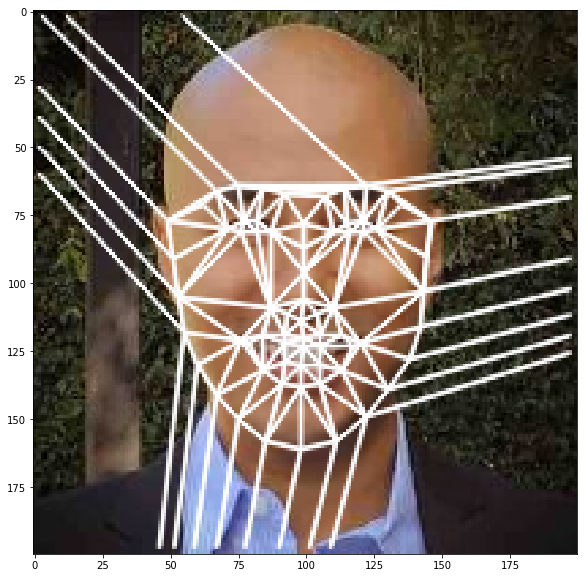

In [95]:
# print(np.shape(chahat_img))
show_img = draw_delaunay(chahat_img.copy(), chahat_img_subdiv,(255, 255, 255));
plt.imshow(show_img)

[[ 3108.     0.     0.  3108.   590.   585.]
 [    0.  3108.  3108.     0. -3108. -3108.]
 [    0.  3108. -3108. -3108.   304.   478.]
 [-3108. -3108.  3108.     0.   574.   341.]
 [  352.   399.   295.   393.   319.   369.]
 [  295.   393.   352.   399.   299.   436.]
 [-3108. -3108.   299.   436.   304.   478.]
 [  299.   436. -3108. -3108.   295.   393.]
 [  295.   393. -3108. -3108.   319.   369.]
 [  417.   401.   433.   482.   395.   407.]
 [  433.   482.   417.   401.   465.   436.]
 [  371.   408.   299.   436.   352.   399.]
 [  299.   436.   371.   408.   304.   478.]
 [    0.  3108.   304.   478.   313.   519.]
 [  407.   541.   327.   558.   313.   519.]
 [  327.   558.   407.   541.   353.   589.]
 [    0.  3108.   313.   519.   327.   558.]
 [  313.   519.   304.   478.   433.   482.]
 [  432.   527.   433.   482.   450.   488.]
 [  433.   482.   432.   527.   407.   541.]
 [    0.  3108.   327.   558.   353.   589.]
 [  501.   482.   508.   528.   485.   520.]
 [  508.  

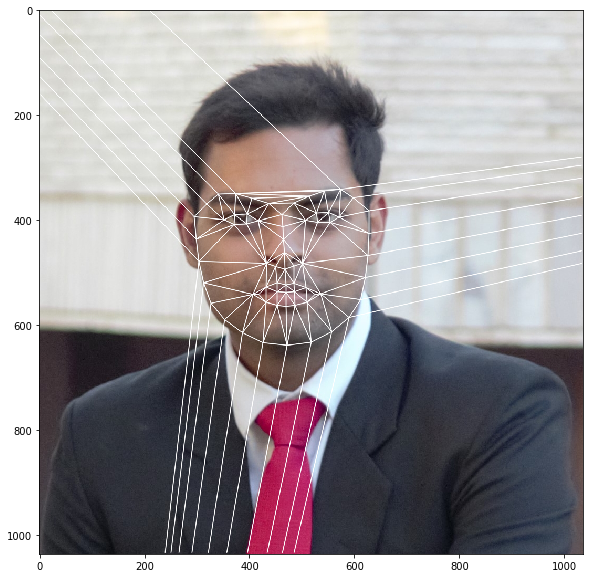

In [96]:
nitin_points_tuple = tuple(map(tuple, nitin_points))
for point in nitin_points_tuple:
    nitin_img_subdiv.insert(point)
show_img = draw_delaunay(nitin_img.copy(), nitin_img_subdiv,(255, 255, 255));
plt.imshow(show_img)

In [97]:
def get_face_params(img,feature_points, allowance=10):
#   input---
#   img: input image
#   feature_points: numpy array of feature points from dlib predictor 
#   allowance: extra region to house face in a rectangle

#   output---
#   cropped face
#   shifted feature points w.r.t cropped face
#   height and width of cropped image

    im_w, im_h = img.shape[:2]
    # finding leftmost point in the image
    left, top = np.min(feature_points, 0)
    # finding bottom right point in the image
    right, bottom = np.max(feature_points, 0)
    
    x, y = max(0, left-allowance), max(0, top-allowance)
    w, h = min(right+allowance, im_h)-x, min(bottom+allowance, im_w)-y
    new_points = feature_points - np.asarray([[x, y]])
    rect = (x, y, w, h)
    cropped_img = img[y:y+h, x:x+w]
    return new_points, rect, cropped_img

In [98]:
src_points, src_shape, src_face = get_face_params(chahat_img.copy(), chahat_points)

In [99]:
dst_points, dst_shape, dst_face = get_face_params(nitin_img.copy(), nitin_points)

In [100]:
def bilinear_interpolate(img, coords):
    """ Interpolates over every image channel
    http://en.wikipedia.org/wiki/Bilinear_interpolation
    :param img: max 3 channel image
    :param coords: 2 x _m_ array. 1st row = xcoords, 2nd row = ycoords
    :returns: array of interpolated pixels with same shape as coords
    """
    int_coords = np.int32(coords)
    x0, y0 = int_coords
    dx, dy = coords - int_coords

    # 4 Neighour pixels
    q11 = img[y0, x0]
    q21 = img[y0, x0 + 1]
    q12 = img[y0 + 1, x0]
    q22 = img[y0 + 1, x0 + 1]

    btm = q21.T * dx + q11.T * (1 - dx)
    top = q22.T * dx + q12.T * (1 - dx)
    inter_pixel = top * dy + btm * (1 - dy)

    return inter_pixel.T

def grid_coordinates(points):
    """ x,y grid coordinates within the ROI of supplied points
    :param points: points to generate grid coordinates
    :returns: array of (x, y) coordinates
    """
    xmin = np.min(points[:, 0])
    xmax = np.max(points[:, 0]) + 1
    ymin = np.min(points[:, 1])
    ymax = np.max(points[:, 1]) + 1
    return np.asarray([(x, y) for y in range(ymin, ymax)
                       for x in range(xmin, xmax)], np.uint32)

def process_warp(src_img, result_img, tri_affines, dst_points, delaunay):
    """
    Warp each triangle from the src_image only within the
    ROI of the destination image (points in dst_points).
    """
    roi_coords = grid_coordinates(dst_points)
    # indices to vertices. -1 if pixel is not in any triangle
    roi_tri_indices = delaunay.find_simplex(roi_coords)

    for simplex_index in range(len(delaunay.simplices)):
        coords = roi_coords[roi_tri_indices == simplex_index]
        num_coords = len(coords)
        out_coords = np.dot(tri_affines[simplex_index],
                            np.vstack((coords.T, np.ones(num_coords))))
        x, y = coords.T
        result_img[y, x] = bilinear_interpolate(src_img, out_coords)


    return None

In [101]:
def triangular_affine_matrices(vertices, src_points, dst_points):
    """
    Calculate the affine transformation matrix for each
    triangle (x,y) vertex from dst_points to src_points
    :param vertices: array of triplet indices to corners of triangle
    :param src_points: array of [x, y] points to landmarks for source image
    :param dst_points: array of [x, y] points to landmarks for destination image
    :returns: 2 x 3 affine matrix transformation for a triangle
    """
    ones = [1, 1, 1]
    for tri_indices in vertices:
        src_tri = np.vstack((src_points[tri_indices, :].T, ones))
        dst_tri = np.vstack((dst_points[tri_indices, :].T, ones))
        mat = np.dot(src_tri, np.linalg.inv(dst_tri))[:2, :]
        yield mat


In [102]:
def warp_image_3d(src_img, src_points, dst_points, dst_shape, dtype=np.uint8):
    rows, cols = dst_shape[:2]
    result_img = np.zeros((rows, cols, 3), dtype=dtype)

    delaunay = spatial.Delaunay(dst_points)
#     print(delaunay.simplices)
#     print(len(delaunay.simplices))
    tri_affines = np.asarray(list(triangular_affine_matrices(
        delaunay.simplices, src_points, dst_points)))

    process_warp(src_img, result_img, tri_affines, dst_points, delaunay)

    return result_img

In [103]:
w, h = dst_face.shape[:2]
warped_src_face = warp_image_3d(src_face.copy(), src_points, dst_points, (w, h))

In [104]:
def mask_from_points(size, points,erode_flag=1):
    radius = 10  # kernel size
    kernel = np.ones((radius, radius), np.uint8)

    mask = np.zeros(size, np.uint8)
    cv2.fillConvexPoly(mask, cv2.convexHull(points), 255)
    if erode_flag:
        mask = cv2.erode(mask, kernel,iterations=1)

    return mask

In [105]:
## Copy-and-paste
def apply_mask(img, mask):
    """ Apply mask to supplied image
    :param img: max 3 channel image
    :param mask: [0-255] values in mask
    :returns: new image with mask applied
    """
    masked_img=cv2.bitwise_and(img,img,mask=mask)

    return masked_img

In [106]:
def correct_colours(im1, im2, landmarks1):
    COLOUR_CORRECT_BLUR_FRAC = 0.75
    LEFT_EYE_POINTS = list(range(42, 48))
    RIGHT_EYE_POINTS = list(range(36, 42))

    blur_amount = COLOUR_CORRECT_BLUR_FRAC * np.linalg.norm(
                              np.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
                              np.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
    blur_amount = int(blur_amount)
    if blur_amount % 2 == 0:
        blur_amount += 1
    im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
    im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)

    # Avoid divide-by-zero errors.
    im2_blur = im2_blur.astype(int)
    im2_blur += 128*(im2_blur <= 1)

    result = im2.astype(np.float64) * im1_blur.astype(np.float64) / im2_blur.astype(np.float64)
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result


In [107]:
## Mask for blending
mask = mask_from_points((w, h), dst_points)
mask_src = np.mean(warped_src_face, axis=2) > 0
mask = np.asarray(mask*mask_src, dtype=np.uint8)

## Correct color
# if not args.warp_2d and args.correct_color:
warped_src_face = apply_mask(warped_src_face, mask)
dst_face_masked = apply_mask(dst_face, mask)
warped_src_face = correct_colours(dst_face_masked, warped_src_face, dst_points)

In [108]:
kernel = np.ones((10, 10), np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)
##Poisson Blending
r = cv2.boundingRect(mask)
center = ((r[0] + int(r[2] / 2), r[1] + int(r[3] / 2)))
output = cv2.seamlessClone(warped_src_face, dst_face, mask, center, cv2.NORMAL_CLONE)

x, y, w, h = dst_shape
dst_img_cp = nitin_img_copy.copy()
dst_img_cp[y:y+h, x:x+w] = output
output = dst_img_cp

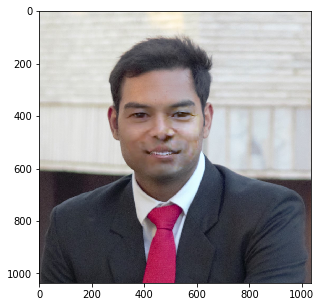

In [109]:
plt.rcParams["figure.figsize"] = (5,5)

plt.imshow(output)

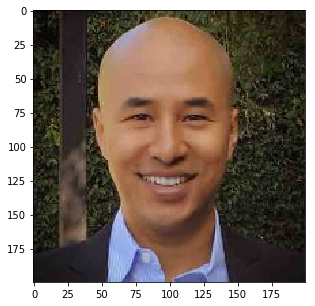

In [110]:
plt.imshow(chahat_img)